In [1]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline

import os
cdir = os.getcwd()
print(cdir)
os.chdir(cdir + '/train/train')
print(os.getcwd())

C:\Projects\activity-recognition-abc
C:\Projects\activity-recognition-abc\train\train


In [2]:
# Multi-head CNN–RNN for multi-time series anomaly detection: An industrial case study

In [3]:
lenX = []

In [4]:
def process(sensordata, timestamps):
    # process
    lenX.append(len(sensordata))
    return sensordata
    
    if len(sensordata) == 0:
        return sensordata
    
    a = np.array(sensordata)
    
    a = (a - np.min(a))/(np.max(a) - np.min(a))
    
    return list(a) # sensordata

In [5]:
import tensorflow as tf

from tfdeterminism import patch
patch()
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
import random
import numpy as np
os.environ['PYTHONHASHSEED']=str(1997)

random.seed(1997)
np.random.seed(1997)
tf.random.set_seed(1997)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

TensorFlow version 2.0.0 has been patched using tfdeterminism version 0.3.0


1 Physical GPUs, 1 Logical GPUs


In [6]:
tf.test.is_gpu_available()

True

In [7]:
def diff(x, y):
    return np.abs(x-y) > 2

ary = np.array([1,1,1,54,53,24,25])
np.split(ary, np.argwhere(diff(ary[1:], ary[:-1])).T[0] + 1)

[array([1, 1, 1]), array([54, 53]), array([24, 25])]

In [8]:
# there are 3 subjects
subject1 = {}
subject2 = {}
subject3 = {}

# we will load every single right arm data, separate based on subject id, do feature extraction, run t-SNE

all_sensors = ['right_arm', 'right_wrist', 'left_hip', 'left_wrist'] #, 'mocap']

data_folder = [f'{sensor}/*.csv' for sensor in all_sensors]

print(data_folder)

files = glob.glob(data_folder[0])

# processing will be done as numpy array

subject1['data'] = []
subject2['data'] = []
subject3['data'] = []
 
# data format : data -> id, process(timeseries, timestamps) : right_arm as numpy array (missing data will be imputed)


# id is generated by concatenating INT(subject+trial)

for f in files:
    #print(f)
    c_sub = {} # current subject
    if f.split(os.sep)[1].split('_')[0] == 'subject1':
        
        c_sub['id'] = int(f.split(os.sep)[1].split('_')[0][-1] + f.split(os.sep)[1].split('_')[2].split('.')[0])
        #print(ra['id'])
        
        for sensor in all_sensors:
            #print(sensor)
            ra = pd.read_csv(sensor + os.sep + f.split(os.sep)[1])
            #print(ra)
            ra.sort_values(by=['timestamp'], inplace = True)
            c_sub[sensor] = {}
            if sensor == 'mocap':
                for axis in mocap_axis:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
            else:
                for axis in ['X', 'Y', 'Z']:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
                
        subject1['data'].append(c_sub)

            
    elif f.split(os.sep)[1].split('_')[0] == 'subject2':
        
        c_sub['id'] = int(f.split(os.sep)[1].split('_')[0][-1] + f.split(os.sep)[1].split('_')[2].split('.')[0])
        #print(ra['id'])
        
        for sensor in all_sensors:
            ra = pd.read_csv(sensor + os.sep + f.split(os.sep)[1])
            #print(ra)
            ra.sort_values(by=['timestamp'], inplace = True)
            c_sub[sensor] = {}
            if sensor == 'mocap':
                for axis in mocap_axis:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
            else:
                for axis in ['X', 'Y', 'Z']:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
                
        subject2['data'].append(c_sub)
            
    elif f.split(os.sep)[1].split('_')[0] == 'subject3':
        
        c_sub['id'] = int(f.split(os.sep)[1].split('_')[0][-1] + f.split(os.sep)[1].split('_')[2].split('.')[0])
        #print(ra['id'])
        
        for sensor in all_sensors:
            ra = pd.read_csv(sensor + os.sep + f.split(os.sep)[1])
            #print(ra)
            ra.sort_values(by=['timestamp'], inplace = True)
            c_sub[sensor] = {}
            if sensor == 'mocap':
                for axis in mocap_axis:
                    try:
                        c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
                    except:
                        c_sub[sensor][axis] = [0]
            else:
                for axis in ['X', 'Y', 'Z']:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
        
        subject3['data'].append(c_sub)
    else:
        print('either new subject or a bug')
        
        
labels = pd.read_csv("labels.txt", sep=' ', header=None)
print(labels.head())
labels = labels[0].str.split(",", n=2, expand=True)
labels.columns = ['file_id', 'macro', 'micro'] #give names to the columns
labels.index = labels['file_id'] #use the file id as index to make it searchable by file_id
print(labels.head())

# label generation
subject1['label_mac'] = {}
subject2['label_mac'] = {}
subject3['label_mac'] = {}

subject1['label_mic'] = {}
subject2['label_mic'] = {}
subject3['label_mic'] = {}

for i in range(len(labels)):
    #print(labels.iloc[i]['file_id'])
    #print(labels.iloc[i]['file_id'].split('_')[0][-1])
    tid = int(labels.iloc[i]['file_id'].split('_')[0][-1] + labels.iloc[i]['file_id'].split('_')[-1])
    #print(tid)
    label = labels.iloc[i]['macro']
    label_mic = labels.iloc[i]['micro'].split(',')[:-1]
    #print(label)
    if labels.iloc[i]['file_id'].split('_')[0][-1] == '1':
        subject1['label_mac'][tid] = label
        subject1['label_mic'][tid] = label_mic
    elif labels.iloc[i]['file_id'].split('_')[0][-1] == '2':
        subject2['label_mac'][tid] = label
        subject2['label_mic'][tid] = label_mic
    elif labels.iloc[i]['file_id'].split('_')[0][-1] == '3':
        subject3['label_mac'][tid] = label
        subject3['label_mic'][tid] = label_mic
    else:
        print('some bug')
        
        
# re-formatting dataset for training

X = []
y = []
y_ml = []  # multi-label

for i in range(len(subject1['data'])):
    tid = subject1['data'][i]['id']
    y.append(subject1['label_mac'][tid])
    y_ml.append(subject1['label_mic'][tid])
    # X shape -> [ip1, ip2, ip3, ip4] ip1 = (80, len, channel) -> 4, 80, len

for sensor in all_sensors:
    cs_data = []
    for i in range(len(subject1['data'])):
        sub_data = []
        if sensor == 'mocap':
            for sig in mocap_axis:
                sub_data.append(np.array(subject1['data'][i][sensor][sig]))
        else:
            for sig in ['X', 'Y', 'Z']:
                sub_data.append(np.array(subject1['data'][i][sensor][sig]))
        sub_data = np.array(sub_data)
        # print(sub_data.shape)
        sub_data = np.swapaxes(sub_data, 0, 1)
        cs_data.append(sub_data)
    X.append(cs_data)
    
    
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y)

y_ohe = to_categorical(vec,len(set(vec)))

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_ml_ohe = mlb.fit_transform(y_ml)

# validatin on subject2, 3

# re-formatting dataset for training

X2 = []
y2 = []
y_ml2 = []

for i in range(len(subject2['data'])):
    tid = subject2['data'][i]['id']
    y2.append(subject2['label_mac'][tid])
    y_ml2.append(subject2['label_mic'][tid])
    # X shape -> [ip1, ip2, ip3, ip4] ip1 = (80, len, channel) -> 4, 80, len

for sensor in all_sensors:
    cs_data = []
    for i in range(len(subject2['data'])):
        sub_data = []
        if sensor == 'mocap':
            for sig in mocap_axis:
                sub_data.append(np.array(subject2['data'][i][sensor][sig]))
        else:
            for sig in ['X', 'Y', 'Z']:
                sub_data.append(np.array(subject2['data'][i][sensor][sig]))
        sub_data = np.array(sub_data)
        # print(sub_data.shape)
        sub_data = np.swapaxes(sub_data, 0, 1)
        cs_data.append(sub_data)
    X2.append(cs_data)
    
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y2)

y2_ohe = to_categorical(vec,len(set(vec)))

mlb = MultiLabelBinarizer()
y_ml2_ohe = mlb.fit_transform(y_ml2)

# validatin on subject2, 3

# re-formatting dataset for training

X3 = []
y3 = []
y_ml3 = []

for i in range(len(subject3['data'])):
    tid = subject3['data'][i]['id']
    y3.append(subject3['label_mac'][tid])
    y_ml3.append(subject3['label_mic'][tid])
    # X shape -> [ip1, ip2, ip3, ip4] ip1 = (80, len, channel) -> 4, 80, len

for sensor in all_sensors:
    cs_data = []
    for i in range(len(subject3['data'])):
        sub_data = []
        if sensor == 'mocap':
            for sig in mocap_axis:
                sub_data.append(np.array(subject3['data'][i][sensor][sig]))
        else:
            for sig in ['X', 'Y', 'Z']:
                sub_data.append(np.array(subject3['data'][i][sensor][sig]))
        sub_data = np.array(sub_data)
        # print(sub_data.shape)
        sub_data = np.swapaxes(sub_data, 0, 1)
        cs_data.append(sub_data)
    X3.append(cs_data)
    

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y3)

y3_ohe = to_categorical(vec,len(set(vec)))

mlb = MultiLabelBinarizer()
y_ml3_ohe = mlb.fit_transform(y_ml3)

['right_arm/*.csv', 'right_wrist/*.csv', 'left_hip/*.csv', 'left_wrist/*.csv']
                                           0
0           subject2_file_457,sandwich,Take,
1      subject2_file_679,sandwich,Wash,Take,
2        subject2_file_95,sandwich,Cut,Wash,
3  subject2_file_899,sandwich,other,Cut,Put,
4            subject2_file_368,sandwich,Put,
                             file_id     macro           micro
file_id                                                       
subject2_file_457  subject2_file_457  sandwich           Take,
subject2_file_679  subject2_file_679  sandwich      Wash,Take,
subject2_file_95    subject2_file_95  sandwich       Cut,Wash,
subject2_file_899  subject2_file_899  sandwich  other,Cut,Put,
subject2_file_368  subject2_file_368  sandwich            Put,


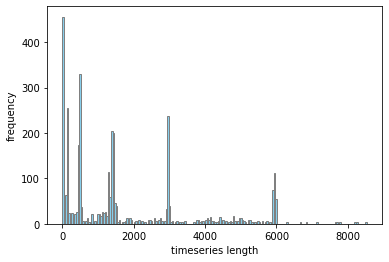

In [124]:
import matplotlib.pyplot as plt
plt.hist(lenX, bins = 200, color = "skyblue", ec="gray")
plt.xlabel('timeseries length')
plt.ylabel('frequency')
plt.savefig('length_var.png', dpi = 300)

In [9]:
label_encoder.classes_

array(['cereal', 'fruitsalad', 'sandwich'], dtype='<U10')

In [10]:
mlb.classes_

array(['Add', 'Cut', 'Mix', 'Open', 'Peel', 'Pour', 'Put', 'Take', 'Wash',
       'other'], dtype=object)

In [9]:
len(X2)

4

In [10]:
# 4, 80, len, 3

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Add, Activation, Conv1D, Dense, LSTM, Bidirectional, Input, GlobalMaxPooling1D, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [12]:
from tensorflow.keras.layers import LeakyReLU

In [12]:
# CNN-head
import tensorflow.keras as keras
def create_model():

    n_sensors = 4
    n_filters = [3, 3, 3, 3] # X, Y, Z


    # make the input layers
    ips = []

    n_f = 0
    for sensor in all_sensors:
        ips.append(Input(shape = (None, n_filters[n_f]), name = sensor + '_ipX'))
        n_f += 1

    print(f'Input tensors: {ips}')
    
    # kernel size = 1 == embedding layer

    convs = []
    for ip in ips:
        conv = Conv1D(filters = 32, kernel_size = 1, padding = 'same', activation = None, name = ip.name.split(':')[0] + '_conv')(ip)
        convs.append(conv)
        
    # batch-normalization
    bns = []
    for conv in convs:
        bn = BatchNormalization()(conv)
        bns.append(bn)

    convs2 = []
    for bn in bns:
        conv2 = Conv1D(filters = 16, kernel_size = 3, dilation_rate = 2, 
                       kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002),
                       bias_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002), 
                       padding = 'same', activation = 'relu')(bn)
        convs2.append(conv2)
        
    # batch-normalization
    bns2 = []
    for conv2 in convs2:
        bn2 = BatchNormalization()(conv2)
        bns2.append(bn2)
        
    # residual
    
    res = []
    cnt_i = 0
    for bn2 in bns2:
        rs = bn2 #Add()([bn2, bns[cnt_i]])
        rs = LeakyReLU(alpha=0.3)(rs)
        cnt_i += 1
        res.append(rs)



    # concatenation

    concat = Concatenate(axis=1, name = 'concat')(res)

    concat_conv = Conv1D(filters = 16, kernel_size = 1, padding = 'same', dilation_rate = 2,
                        kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002),
                        bias_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002),
                        activation = 'relu', name = 'concat_conv')(concat)
    
    bn3 = BatchNormalization()(concat_conv)
    con_conv2 = Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = None, name = 'con_conv2')(bn3)
    bn4 = BatchNormalization()(con_conv2)
    
    #res2 = Add()([bn4, bn3])
    res2 = LeakyReLU(alpha=0.3)(bn4)
    
    gmp = GlobalMaxPooling1D()(res2)

    # simple FC
    final_softmax = Dense(3, activation = 'sigmoid')(gmp)
    simple_conv = Model(ips, final_softmax)
    return simple_conv

In [13]:
simple_conv = create_model()

Input tensors: [<tf.Tensor 'right_arm_ipX:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX:0' shape=(None, None, 3) dtype=float32>]


In [14]:
simple_conv.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
right_arm_ipX (InputLayer)      [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
right_wrist_ipX (InputLayer)    [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_hip_ipX (InputLayer)       [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_wrist_ipX (InputLayer)     [(None, None, 3)]    0                                            
______________________________________________________________________________________________

In [15]:
simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(lr=0.001))

In [110]:
tf.keras.utils.plot_model(
    simple_conv, to_file='model1.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=300
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [21]:
X[0][0].shape

(1399, 3)

In [22]:
len(X[0])

80

In [23]:
len(X[0])

80

In [24]:
np.array([[0, 0, 0]]).shape

(1, 3)

In [16]:
def train(simple_conv, X, y_ohe, EPOCH, train_split=1.0):
    # single zero padding for NULL datas

    for i in range(len(X)):
        for j in range(len(X[0])):
            if len(X) == 5 and i == len(X)-1: # assuming mocap always comes in the last index
                if len(X[i][j]) == 0:
                    X[i][j] = np.zeros((1, 87))
            else:
                if len(X[i][j]) == 0:
                    X[i][j] = np.array([[0., 0., 0.]], dtype = np.float32)

    report_acc = 0.0
    for epoch in range(EPOCH):
        print(f'Training epoch {epoch} ...')
        avg_loss = 0.0
        avg_acc = 0.0
        avg_mae = 0.0

        for sample_i in tqdm(range(int(len(X[0])*train_split))):
            [train_loss, acc, mae]   =  simple_conv.train_on_batch([X[0][sample_i].reshape(1,len(X[0][sample_i]),3), 
                                        X[1][sample_i].reshape(1,len(X[1][sample_i]),3), 
                                        X[2][sample_i].reshape(1,len(X[2][sample_i]),3), 
                                        X[3][sample_i].reshape(1,len(X[3][sample_i]),3)],
                                        #X[4][sample_i].reshape(1,len(X[4][sample_i]),3*29)], 
                                        y_ohe[sample_i].reshape(1,3))
            avg_loss += train_loss/(len(X[0])*train_split)
            avg_acc += acc/(len(X[0])*train_split)
            avg_mae += mae/(len(X[0])*train_split)
        report_acc = avg_acc
        print(f'acc: {avg_acc} mae: {avg_mae} loss: {avg_loss}')
        #print('Running validation ...')
        avg_loss = 0.0
        avg_acc = 0.0
        avg_mae = 0.0
        for sample_i in tqdm(range(int(len(X[0])*train_split), len(X[0]))):
            [test_loss, acc, mae]   =  simple_conv.test_on_batch([X[0][sample_i].reshape(1,len(X[0][sample_i]),3), 
                                        X[1][sample_i].reshape(1,len(X[1][sample_i]),3), 
                                        X[2][sample_i].reshape(1,len(X[2][sample_i]),3), 
                                        X[3][sample_i].reshape(1,len(X[3][sample_i]),3)],
                                        #X[4][sample_i].reshape(1,len(X[4][sample_i]),3*29)], 
                                        y_ohe[sample_i].reshape(1,3))
            avg_loss += test_loss/(len(X[0])*(1-train_split))
            avg_acc += acc/(len(X[0])*(1-train_split))
            avg_mae += mae/(len(X[0])*(1-train_split))
            
        #print(f'test acc: {avg_acc} mae: {avg_mae} loss: {avg_loss}')
        
    return simple_conv, report_acc

In [17]:
def test(simple_conv, X2, y2_ohe):
    for i in range(len(X2)):
        for j in range(len(X2[0])):
            if len(X2) == 5 and i == len(X2)-1: # assuming mocap always comes in the last index
                if len(X2[i][j]) == 0:
                    X2[i][j] = np.zeros((1, 87))
            else:
                if len(X2[i][j]) == 0:
                    X2[i][j] = np.array([[0., 0., 0.]], dtype=np.float32)

    print('Running test on subject ...')
    avg_loss = 0.0
    avg_acc = 0.0
    avg_mae = 0.0
    for sample_i in tqdm(range(int(len(X2[0])))):
        [test_loss, acc, mae]   =  simple_conv.test_on_batch([X2[0][sample_i].reshape(1,len(X2[0][sample_i]),3), 
                                    X2[1][sample_i].reshape(1,len(X2[1][sample_i]),3), 
                                    X2[2][sample_i].reshape(1,len(X2[2][sample_i]),3), 
                                    X2[3][sample_i].reshape(1,len(X2[3][sample_i]),3)],
                                    #X2[4][sample_i].reshape(1,len(X2[4][sample_i]),3*29)], 
                                    y2_ohe[sample_i].reshape(1,3))
        avg_loss += test_loss/(len(X2[0]))
        avg_acc += acc/(len(X2[0]))
        avg_mae += mae/(len(X2[0]))
    print(f'test acc: {avg_acc} mae: {avg_mae} loss: {avg_loss}')
    return avg_acc

In [13]:
from tensorflow.keras.activations import *

In [22]:
# train on subject1
# validate on subject2, 3

from tqdm import tqdm
from tensorflow.keras.optimizers import RMSprop

report = []

for xytst in [(X, y_ohe, 'X1'), (X2, y2_ohe, 'X2'), (X3, y3_ohe, 'X3')]:
    
    simple_conv = create_model()
    
    xytr = [a for a in [(X, y_ohe, 'X1'), (X2, y2_ohe, 'X2'), (X3, y3_ohe, 'X3')] if a!=xytst]

    EPOCH = 3
    train_split = 1.0
    lr = 0.001

    for e in range(EPOCH):
        simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(learning_rate=lr))
        simple_conv, acc = train(simple_conv, xytr[0][0], xytr[0][1], 1, train_split)
        lr /= 1.5
        simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(learning_rate=lr))
        simple_conv, acc2 = train(simple_conv, xytr[1][0], xytr[1][1], 1, train_split)
        lr /= 2.0
    

    print('-------------------------------------------------')
    print('Test phase')
    print(f'Testing {xytst[2]}')

    t_acc = test(simple_conv, xytst[0], xytst[1])
    report.append(f'TR: {[a[2] for a in xytr]}   TS: {xytst[2]} acc1: {acc} acc2: {acc2} test_acc: {t_acc}')


print('--------------------report----------------------')
for ta in report:
    print(ta)

Input tensors: [<tf.Tensor 'right_arm_ipX_4:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_4:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_4:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_4:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.30it/s]


acc: 0.6158730279831658 mae: 0.4063949664079007 loss: 7.871441759381979


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.09it/s]


acc: 0.6957928908681407 mae: 0.3479910422256667 loss: 7.217523829450885


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.26it/s]


acc: 0.653968264943077 mae: 0.3666460505553654 loss: 6.843003141312375


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.55it/s]


acc: 0.8381877093060504 mae: 0.21694136324798624 loss: 6.257785352688389


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.40it/s]


acc: 0.7746031832127337 mae: 0.2960581030785327 loss: 6.241385409945533


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.82it/s]


acc: 0.9255663457426052 mae: 0.1799481676633468 loss: 5.925602477731057


0it [00:00, ?it/s]


-------------------------------------------------
Test phase
Testing X1
Running test on subject ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 25.32it/s]


test acc: 0.5125000089406965 mae: 0.5013030202186202 loss: 7.978852862119674
Input tensors: [<tf.Tensor 'right_arm_ipX_5:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_5:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_5:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_5:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.16it/s]


acc: 0.5916666768491262 mae: 0.40299423623364405 loss: 8.094076949357987


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.54it/s]


acc: 0.7281553487754564 mae: 0.3053182032758874 loss: 7.146400877572958


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.35it/s]


acc: 0.7250000093132251 mae: 0.3416592527064495 loss: 6.868500697612765


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.62it/s]


acc: 0.8511326911958677 mae: 0.19213611112027842 loss: 6.231597400406031


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.43it/s]


acc: 0.7750000089406959 mae: 0.295021641603671 loss: 6.314360362291335


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.69it/s]


acc: 0.9158576087465563 mae: 0.15626447112816064 loss: 5.8973407328707514


0it [00:00, ?it/s]


-------------------------------------------------
Test phase
Testing X2
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:03<00:00, 28.41it/s]


test acc: 0.5809523894673301 mae: 0.43376664019971417 loss: 7.750833638509111
Input tensors: [<tf.Tensor 'right_arm_ipX_6:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_6:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_6:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_6:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.39it/s]


acc: 0.6375000100582833 mae: 0.37942148300353434 loss: 8.079330956935884


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.46it/s]


acc: 0.577777788752601 mae: 0.42808404038881964 loss: 7.265181028275267


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.44it/s]


acc: 0.7125000096857541 mae: 0.35057753929868346 loss: 6.6756746649742125


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:09<00:00, 10.53it/s]


acc: 0.7269841367290129 mae: 0.32436825162952854 loss: 6.450872689201719


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.44it/s]


acc: 0.7583333421498529 mae: 0.3146011668723075 loss: 6.271782767772675


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.37it/s]


acc: 0.8000000082311168 mae: 0.2877171883625644 loss: 6.172029240926106


0it [00:00, ?it/s]


-------------------------------------------------
Test phase
Testing X3
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:03<00:00, 29.00it/s]


test acc: 0.5210356090253997 mae: 0.48485157559218917 loss: 6.964460576622234
--------------------report----------------------
TR: ['X2', 'X3']   TS: X1 acc1: 0.7746031832127337 acc2: 0.9255663457426052 test_acc: 0.5125000089406965
TR: ['X1', 'X3']   TS: X2 acc1: 0.7750000089406959 acc2: 0.9158576087465563 test_acc: 0.5809523894673301
TR: ['X1', 'X2']   TS: X3 acc1: 0.7583333421498529 acc2: 0.8000000082311168 test_acc: 0.5210356090253997


In [104]:
(0.512 + 0.5809 + 0.521)/3.0

0.5379666666666667

In [126]:
X_all = [
    X[0] + X2[0] + X3[0],
    X[1] + X2[1] + X3[1],
    X[2] + X2[2] + X3[2],
    X[3] + X2[3] + X3[3]
]

In [127]:
X_all_p = list(map(list, zip(*X_all)))

In [128]:
len(X_all_p)

288

In [133]:
y_all = np.concatenate((y_ml_ohe, y_ml2_ohe, y_ml3_ohe), axis = 0)

In [134]:
y_all.shape

(288, 10)

In [135]:
z = list(zip(X_all_p, y_all))
random.shuffle(z)
X_all = [a[0] for a in z]
y_all = [a[1] for a in z]

In [136]:
len(X_all)

288

In [137]:
y_all[:5]

[array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])]

In [138]:
X_all = list(map(list, zip(*X_all)))

In [139]:
len(X_all)

4

In [67]:
# final training for submission

simple_conv = create_model()

EPOCH = 3
train_split = 1.0
lr = 0.001

for e in range(EPOCH):
    simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv, acc = train(simple_conv, X, y_ohe, 1, train_split)
    lr /= 1.5
    simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv, acc2 = train(simple_conv, X2, y2_ohe, 1, train_split)
    lr /= 2.0
    
    simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv, acc2 = train(simple_conv, X3, y3_ohe, 1, train_split)
    lr /= 2.0

Input tensors: [<tf.Tensor 'right_arm_ipX_8:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_8:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_8:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_8:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.02it/s]


acc: 0.6458333458751435 mae: 0.38997064910363405 loss: 8.220000702142718


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.49it/s]


acc: 0.644444455986931 mae: 0.38366225187977165 loss: 7.1689556939261285


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.81it/s]


acc: 0.6310679730281091 mae: 0.3984322998044307 loss: 7.046789331343569


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.01it/s]


acc: 0.6750000104308123 mae: 0.3546131191600579 loss: 6.639132088422775


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.36it/s]


acc: 0.7269841378643394 mae: 0.3116041126882746 loss: 6.476493671962194


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.41it/s]


acc: 0.8122977429223291 mae: 0.2721151079828805 loss: 6.302491164901883


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.19it/s]


acc: 0.750000010058283 mae: 0.3201453694491646 loss: 6.34494128227234


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.51it/s]


acc: 0.7968254063810615 mae: 0.28430644422769547 loss: 6.299780237107049


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.94it/s]


acc: 0.8576051853235483 mae: 0.24472648909686193 loss: 6.184087369048477


0it [00:00, ?it/s]


In [68]:
# mixed low learning rate training
lr = 0.00005
EPOCH = 2
for e in range(EPOCH):
    simple_conv.compile(loss='binary_crossentropy', metrics=['acc', 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv, acc = train(simple_conv, X_all, y_all, 1, train_split)
    lr /= 1.5

Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:32<00:00,  8.83it/s]


acc: 0.8043981570129598 mae: 0.2792873050705872 loss: 6.211085337731571


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:30<00:00,  9.57it/s]


acc: 0.8263888971673119 mae: 0.26580752829462057 loss: 6.11138095789485


0it [00:00, ?it/s]


In [69]:
simple_conv.save('loss_6_11.h5')

In [25]:
len(mlb.classes_)

10

In [14]:
from tensorflow.keras import backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [105]:
# task 2, micro-activity

# CNN-head

def create_model_task2():
    n_sensors = 4
    n_filters = [3, 3, 3, 3] # X, Y, Z


    # make the input layers
    ips = []

    n_f = 0
    for sensor in all_sensors:
        ips.append(Input(shape = (None, n_filters[n_f]), name = sensor + '_ipX'))
        n_f += 1

    print(f'Input tensors: {ips}')
    
    # kernel size = 1 == embedding layer

    convs = []
    for ip in ips:
        conv = Conv1D(filters = 16, kernel_size = 1, padding = 'same', activation = None, name = ip.name.split(':')[0] + '_conv')(ip)
        convs.append(conv)
        
    # batch-normalization
    bns = []
    for conv in convs:
        bn = BatchNormalization()(conv)
        bns.append(bn)

    convs2 = []
    for bn in bns:
        conv2 = Conv1D(filters = 16, kernel_size = 3, dilation_rate = 2, 
                       kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002),
                       bias_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002), 
                       padding = 'same', activation = 'relu')(bn)
        convs2.append(conv2)
        
    # batch-normalization
    bns2 = []
    for conv2 in convs2:
        bn2 = BatchNormalization()(conv2)
        bns2.append(bn2)
        
    # residual
    
    res = []
    cnt_i = 0
    for bn2 in bns2:
        rs = bn2 # Add()([bn2, bns[cnt_i]]) # bn2
        rs = LeakyReLU(alpha=0.3)(rs)
        cnt_i += 1
        res.append(rs)



    # concatenation

    concat = Concatenate(axis=1, name = 'concat')(res)

    concat_conv = Conv1D(filters = 16, kernel_size = 1, padding = 'same', dilation_rate = 2,
                        kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002),
                        bias_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.002),
                        activation = 'relu', name = 'concat_conv')(concat)
    
    bn3 = BatchNormalization()(concat_conv)
    con_conv2 = Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = None, name = 'con_conv2')(bn3)
    bn4 = BatchNormalization()(con_conv2)
    
    #res2 = Add()([bn4, bn3])
    res2 = LeakyReLU(alpha=0.3)(bn4)
    
    gmp = GlobalMaxPooling1D()(res2)

    # simple FC
    final_sigmoid = Dense(10, activation = 'sigmoid')(gmp)
    simple_conv = Model(ips, final_sigmoid)
    return simple_conv

In [106]:
task2_model = create_model_task2()

Input tensors: [<tf.Tensor 'right_arm_ipX_34:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_34:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_34:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_34:0' shape=(None, None, 3) dtype=float32>]


In [107]:
task2_model.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
right_arm_ipX (InputLayer)      [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
right_wrist_ipX (InputLayer)    [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_hip_ipX (InputLayer)       [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_wrist_ipX (InputLayer)     [(None, None, 3)]    0                                            
___________________________________________________________________________________________

In [96]:
def train_task2(simple_conv, X, y_ohe, EPOCH, train_split=1.0):
    # single zero padding for NULL datas

    for i in range(len(X)):
        for j in range(len(X[0])):
            if len(X) == 5 and i == len(X)-1: # assuming mocap always comes in the last index
                if len(X[i][j]) == 0:
                    X[i][j] = np.zeros((1, 87))
            else:
                if len(X[i][j]) == 0:
                    X[i][j] = np.array([[0., 0., 0.]], dtype = np.float32)

    report_acc = 0.0
    for epoch in range(EPOCH):
        print(f'Training epoch {epoch} ...')
        avg_loss = 0.0
        avg_acc = 0.0
        avg_mae = 0.0

        for sample_i in tqdm(range(int(len(X[0])*train_split))):
            [train_loss, acc, mae]   =  simple_conv.train_on_batch([X[0][sample_i].reshape(1,len(X[0][sample_i]),3), 
                                        X[1][sample_i].reshape(1,len(X[1][sample_i]),3), 
                                        X[2][sample_i].reshape(1,len(X[2][sample_i]),3), 
                                        X[3][sample_i].reshape(1,len(X[3][sample_i]),3)],
                                        #X[4][sample_i].reshape(1,len(X[4][sample_i]),3*29)], 
                                        y_ohe[sample_i].reshape(1,10))
            avg_loss += train_loss/(len(X[0])*train_split)
            avg_acc += acc/(len(X[0])*train_split)
            avg_mae += mae/(len(X[0])*train_split)
        report_acc = avg_acc
        print(f'f1: {avg_acc} mae: {avg_mae} loss: {avg_loss}')
        #print('Running validation ...')
        avg_loss = 0.0
        avg_acc = 0.0
        avg_mae = 0.0
        for sample_i in tqdm(range(int(len(X[0])*train_split), len(X[0]))):
            [test_loss, acc, mae]   =  simple_conv.test_on_batch([X[0][sample_i].reshape(1,len(X[0][sample_i]),3), 
                                        X[1][sample_i].reshape(1,len(X[1][sample_i]),3), 
                                        X[2][sample_i].reshape(1,len(X[2][sample_i]),3), 
                                        X[3][sample_i].reshape(1,len(X[3][sample_i]),3)],
                                        #X[4][sample_i].reshape(1,len(X[4][sample_i]),3*29)], 
                                        y_ohe[sample_i].reshape(1,10))
            avg_loss += test_loss/(len(X[0])*(1-train_split))
            avg_acc += acc/(len(X[0])*(1-train_split))
            avg_mae += mae/(len(X[0])*(1-train_split))
            
        #print(f'test acc: {avg_acc} mae: {avg_mae} loss: {avg_loss}')
        
    return simple_conv, report_acc

def test_task2(simple_conv, X2, y2_ohe, threshold = 0.5):
    for i in range(len(X2)):
        for j in range(len(X2[0])):
            if len(X2) == 5 and i == len(X2)-1: # assuming mocap always comes in the last index
                if len(X2[i][j]) == 0:
                    X2[i][j] = np.zeros((1, 87))
            else:
                if len(X2[i][j]) == 0:
                    X2[i][j] = np.array([[0., 0., 0.]], dtype = np.float32)

    print('Running test on subject ...')
    avg_loss = 0.0
    avg_f1 = 0.0
    avg_mae = 0.0
    avg_acc = 0.0
    for sample_i in tqdm(range(int(len(X2[0])))):
        [test_loss, f1, mae]   =  simple_conv.test_on_batch([X2[0][sample_i].reshape(1,len(X2[0][sample_i]),3), 
                                    X2[1][sample_i].reshape(1,len(X2[1][sample_i]),3), 
                                    X2[2][sample_i].reshape(1,len(X2[2][sample_i]),3), 
                                    X2[3][sample_i].reshape(1,len(X2[3][sample_i]),3)],
                                    #X2[4][sample_i].reshape(1,len(X2[4][sample_i]),3*29)], 
                                    y2_ohe[sample_i].reshape(1,10))
        p = simple_conv.predict([X2[0][sample_i].reshape(1,len(X2[0][sample_i]),3), 
                                    X2[1][sample_i].reshape(1,len(X2[1][sample_i]),3), 
                                    X2[2][sample_i].reshape(1,len(X2[2][sample_i]),3), 
                                    X2[3][sample_i].reshape(1,len(X2[3][sample_i]),3)])[0]
        p[p<threshold] = 0.0
        p[p>=threshold] = 1.0
        pred_lab = []
        true_lab = []
        cl = 0
        for cp in p:
            if cp >= threshold:
                pred_lab.append(cl)
            cl += 1
            
        cl = 0
        for cp in y2_ohe[sample_i]:
            if cp >= threshold:
                true_lab.append(cl)
            cl += 1
            
        avg_acc += (len(  list(set(pred_lab).intersection(true_lab))   )/len(list(set(pred_lab+true_lab))))/(len(X2[0]))
        
        avg_loss += test_loss/(len(X2[0]))
        avg_f1 += f1/(len(X2[0]))
        avg_mae += mae/(len(X2[0]))
    print(f'test f1: {avg_f1} test acc: {avg_acc} mae: {avg_mae} loss: {avg_loss}')
    return avg_acc

In [80]:
set([1,2]).intersection([1,2, 2])

{1, 2}

In [125]:
# train on subject1
# validate on subject2, 3

from tqdm import tqdm

report = []

for xytst in [(X, y_ml_ohe, 'X1'), (X2, y_ml2_ohe, 'X2'), (X3, y_ml3_ohe, 'X3')]:
    
    simple_conv_task2 = create_model_task2()
    
    xytr = [a for a in [(X, y_ml_ohe, 'X1'), (X2, y_ml2_ohe, 'X2'), (X3, y_ml3_ohe, 'X3')] if a!=xytst]
    
    EPOCH = 15
    train_split = 1.0
    lr = 0.001

    for e in range(EPOCH):
        simple_conv_task2.compile(loss='binary_crossentropy', metrics=[get_f1, 'mae'], optimizer=Adam(learning_rate=lr))
        simple_conv_task2, acc = train_task2(simple_conv_task2, xytr[0][0], xytr[0][1], 1, train_split)
        lr /= 1.5
        simple_conv_task2.compile(loss='mse', metrics=[get_f1, 'mae'], optimizer=Adam(learning_rate=lr))
        simple_conv_task2, acc2 = train_task2(simple_conv_task2, xytr[1][0], xytr[1][1], 1, train_split)
        lr /= 2.0
    

    print('-------------------------------------------------')
    print('Test phase')
    print(f'Testing {xytst[2]}')

    for th in [0.28, 0.3, 0.33, 0.35, 0.4]:
        t_acc = test_task2(simple_conv_task2, xytst[0], xytst[1], th)
        report.append(f'th: {th} TR: {[a[2] for a in xytr]}   TS: {xytst[2]} acc1: {acc} acc2: {acc2} test_acc: {t_acc}')


print('--------------------report----------------------')
for ta in report:
    print(ta)

Input tensors: [<tf.Tensor 'right_arm_ipX_41:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_41:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_41:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_41:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.58it/s]


f1: 0.43660065489155936 mae: 0.3141729822471029 loss: 5.4001261938185925


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.30it/s]


f1: 0.3793342223445187 mae: 0.2482129723122977 loss: 3.8136899980526517


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.30it/s]


f1: 0.5292743166287741 mae: 0.21304808322872434 loss: 3.537366553715298


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.41it/s]


f1: 0.46942514152202763 mae: 0.22049424609223603 loss: 3.030871196857934


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.37it/s]


f1: 0.6279364407062528 mae: 0.19777996887763336 loss: 3.1104106903076163


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.54it/s]


f1: 0.5369239796712557 mae: 0.20196738884359314 loss: 2.801193667846975


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.25it/s]


f1: 0.6608918502217246 mae: 0.19340172129727543 loss: 2.9772351628258122


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.26it/s]


f1: 0.5688934621301666 mae: 0.1949866668691913 loss: 2.7278243500052146


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.08it/s]


f1: 0.6775585146177381 mae: 0.19120533012208477 loss: 2.9330748149326875


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.79it/s]


f1: 0.5737478296154906 mae: 0.19260917669071728 loss: 2.7033944801219456


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:09<00:00, 10.54it/s]


f1: 0.6759712136927104 mae: 0.19041849949530198 loss: 2.9184658141363236


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.66it/s]


f1: 0.5737478296154906 mae: 0.19180667599283371 loss: 2.695324122327046


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.84it/s]


f1: 0.6791458161104291 mae: 0.19014757571830626 loss: 2.913613589604696


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.45it/s]


f1: 0.5737478296154906 mae: 0.19153916380069783 loss: 2.6926450752517552


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.35it/s]


f1: 0.6791458161104291 mae: 0.19005569748225665 loss: 2.9119969753991994


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.50it/s]


f1: 0.5737478296154906 mae: 0.1914514083668446 loss: 2.6917540170614007


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [01:49<00:00,  1.05s/it]


f1: 0.6791458161104291 mae: 0.1900250328261228 loss: 2.9114585490453795


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  8.97it/s]


f1: 0.5737478296154906 mae: 0.19142204193958962 loss: 2.6914570632490147


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.14it/s]


f1: 0.6791458161104291 mae: 0.19001472705886482 loss: 2.911279401325045


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  8.65it/s]


f1: 0.5737478296154906 mae: 0.19141234041562355 loss: 2.69135835332778


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.25it/s]


f1: 0.6791458161104291 mae: 0.19001141013134093 loss: 2.9112200964064825


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.65it/s]


f1: 0.5737478296154906 mae: 0.19140907445723568 loss: 2.691327451502236


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  8.87it/s]


f1: 0.6791458161104291 mae: 0.19001057055734438 loss: 2.9112045833042686


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  9.15it/s]


f1: 0.5737478296154906 mae: 0.19140825796763875 loss: 2.691320544307672


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.67it/s]


f1: 0.6791458161104291 mae: 0.19001047004546437 loss: 2.9112024579729354


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.10it/s]


f1: 0.5737478296154906 mae: 0.19140813803499188 loss: 2.6913196531314285


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.73it/s]


f1: 0.6791458161104291 mae: 0.1900104506739548 loss: 2.911202196847824


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  8.80it/s]


f1: 0.5737478296154906 mae: 0.19140812450820963 loss: 2.6913193776769546


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.10it/s]


f1: 0.6791458161104291 mae: 0.1900104507094338 loss: 2.911201763153075


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  9.11it/s]


f1: 0.5737478296154906 mae: 0.19140811651511097 loss: 2.691319370732724


0it [00:00, ?it/s]


-------------------------------------------------
Test phase
Testing X1
Running test on subject ...


  5%|████▏                                                                              | 4/80 [00:03<01:01,  1.24it/s]

  6%|█████▏                                                                             | 5/80 [00:03<00:58,  1.28it/s]

  8%|██████▏                                                                            | 6/80 [00:04<00:56,  1.31it/s]

  9%|███████▎                                                                           | 7/80 [00:05<00:54,  1.34it/s]

 10%|████████▎                                                                          | 8/80 [00:06<00:53,  1.34it/s]

 11%|█████████▎                                                                         | 9/80 [00:06<00:53,  1.33it/s]

 12%|██████████▎                                                                       | 10/80 [00:07<00:54,  1.29it/s]

 14%|███████████▎                                                                      | 11/80 [00:08<00:52,  1.32it/s]

 15%|████████████▎                                                                     | 12/80 [00:08<00:49,  1.37it/s]

 16%|█████████████▎                                                                    | 13/80 [00:09<00:47,  1.42it/s]

 18%|██████████████▎                                                                   | 14/80 [00:10<00:45,  1.46it/s]

 19%|███████████████▍                                                                  | 15/80 [00:10<00:43,  1.49it/s]

 20%|████████████████▍                                                                 | 16/80 [00:11<00:42,  1.51it/s]

 21%|█████████████████▍                                                                | 17/80 [00:12<00:41,  1.51it/s]

 22%|██████████████████▍                                                               | 18/80 [00:12<00:41,  1.51it/s]

 24%|███████████████████▍                                                              | 19/80 [00:13<00:39,  1.53it/s]

 25%|████████████████████▌                                                             | 20/80 [00:14<00:38,  1.55it/s]

 26%|█████████████████████▌                                                            | 21/80 [00:14<00:37,  1.56it/s]

 28%|██████████████████████▌                                                           | 22/80 [00:15<00:37,  1.56it/s]

 29%|███████████████████████▌                                                          | 23/80 [00:16<00:36,  1.57it/s]

 30%|████████████████████████▌                                                         | 24/80 [00:16<00:36,  1.55it/s]

 31%|█████████████████████████▋                                                        | 25/80 [00:17<00:35,  1.53it/s]

 32%|██████████████████████████▋                                                       | 26/80 [00:18<00:35,  1.54it/s]

 34%|███████████████████████████▋                                                      | 27/80 [00:18<00:35,  1.50it/s]

 35%|████████████████████████████▋                                                     | 28/80 [00:19<00:34,  1.51it/s]

 36%|█████████████████████████████▋                                                    | 29/80 [00:20<00:33,  1.53it/s]

 38%|██████████████████████████████▊                                                   | 30/80 [00:20<00:33,  1.48it/s]

 39%|███████████████████████████████▊                                                  | 31/80 [00:21<00:33,  1.47it/s]

 40%|████████████████████████████████▊                                                 | 32/80 [00:22<00:31,  1.51it/s]

 41%|█████████████████████████████████▊                                                | 33/80 [00:22<00:30,  1.54it/s]

 42%|██████████████████████████████████▊                                               | 34/80 [00:23<00:29,  1.57it/s]

 44%|███████████████████████████████████▉                                              | 35/80 [00:23<00:28,  1.59it/s]

 45%|████████████████████████████████████▉                                             | 36/80 [00:24<00:27,  1.60it/s]

 46%|█████████████████████████████████████▉                                            | 37/80 [00:25<00:26,  1.62it/s]

 48%|██████████████████████████████████████▉                                           | 38/80 [00:25<00:26,  1.61it/s]

 49%|███████████████████████████████████████▉                                          | 39/80 [00:26<00:25,  1.62it/s]

 50%|█████████████████████████████████████████                                         | 40/80 [00:26<00:24,  1.62it/s]

 51%|██████████████████████████████████████████                                        | 41/80 [00:27<00:23,  1.63it/s]

 52%|███████████████████████████████████████████                                       | 42/80 [00:28<00:23,  1.63it/s]

 54%|████████████████████████████████████████████                                      | 43/80 [00:28<00:22,  1.63it/s]

 55%|█████████████████████████████████████████████                                     | 44/80 [00:29<00:22,  1.63it/s]

 56%|██████████████████████████████████████████████▏                                   | 45/80 [00:30<00:21,  1.63it/s]

 57%|███████████████████████████████████████████████▏                                  | 46/80 [00:30<00:20,  1.63it/s]

 59%|████████████████████████████████████████████████▏                                 | 47/80 [00:31<00:20,  1.64it/s]

 60%|█████████████████████████████████████████████████▏                                | 48/80 [00:31<00:19,  1.62it/s]

 61%|██████████████████████████████████████████████████▏                               | 49/80 [00:32<00:19,  1.59it/s]

 62%|███████████████████████████████████████████████████▎                              | 50/80 [00:33<00:19,  1.54it/s]

 64%|████████████████████████████████████████████████████▎                             | 51/80 [00:33<00:19,  1.52it/s]

 65%|█████████████████████████████████████████████████████▎                            | 52/80 [00:34<00:18,  1.55it/s]

 66%|██████████████████████████████████████████████████████▎                           | 53/80 [00:35<00:17,  1.57it/s]

 68%|███████████████████████████████████████████████████████▎                          | 54/80 [00:35<00:16,  1.58it/s]

 69%|████████████████████████████████████████████████████████▍                         | 55/80 [00:36<00:15,  1.60it/s]

 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [00:36<00:14,  1.61it/s]

 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [00:37<00:14,  1.61it/s]

 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [00:38<00:13,  1.60it/s]

 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [00:38<00:13,  1.60it/s]

 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [00:39<00:12,  1.60it/s]

 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [00:40<00:12,  1.57it/s]

 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [00:40<00:11,  1.59it/s]

 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [00:41<00:10,  1.62it/s]

 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [00:42<00:10,  1.54it/s]

 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [00:42<00:09,  1.57it/s]

 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [00:43<00:08,  1.56it/s]

 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [00:43<00:08,  1.55it/s]

 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [00:44<00:07,  1.56it/s]

 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [00:45<00:07,  1.56it/s]

 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [00:45<00:06,  1.59it/s]

 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [00:46<00:05,  1.57it/s]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [00:47<00:05,  1.56it/s]

 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [00:47<00:04,  1.54it/s]

 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [00:48<00:03,  1.54it/s]

 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [00:49<00:03,  1.53it/s]

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [00:49<00:02,  1.54it/s]

 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [00:50<00:01,  1.55it/s]

 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [00:51<00:01,  1.56it/s]

 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [00:51<00:00,  1.57it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:52<00:00,  1.53it/s]


test f1: 0.30541663281619547 test acc: 0.23125000000000007 mae: 0.2790989083237946 loss: 2.791248059272765
Running test on subject ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:06<00:00, 11.46it/s]


test f1: 0.30541663281619547 test acc: 0.22812500000000008 mae: 0.2790989083237946 loss: 2.791248059272765
Running test on subject ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:06<00:00, 11.68it/s]


test f1: 0.30541663281619547 test acc: 0.23375000000000012 mae: 0.2790989083237946 loss: 2.791248059272765
Running test on subject ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:12<00:00,  6.37it/s]


test f1: 0.30541663281619547 test acc: 0.23375000000000012 mae: 0.2790989083237946 loss: 2.791248059272765
Running test on subject ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 11.22it/s]


test f1: 0.30541663281619547 test acc: 0.22708333333333341 mae: 0.2790989083237946 loss: 2.791248059272765
Input tensors: [<tf.Tensor 'right_arm_ipX_42:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_42:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_42:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_42:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.52it/s]


f1: 0.33145829327404486 mae: 0.27787393457256254 loss: 5.321438968181611


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.95it/s]


f1: 0.36689778439049553 mae: 0.2561775333456045 loss: 3.9221408181977493


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.76it/s]


f1: 0.4527975603938102 mae: 0.21104347070213408 loss: 3.8224374979734423


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.30it/s]


f1: 0.5908228705808952 mae: 0.2060002405919785 loss: 3.2487717369227735


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.65it/s]


f1: 0.4991070840507745 mae: 0.1936175832641311 loss: 3.3999562859535213


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.89it/s]


f1: 0.6582292445655004 mae: 0.18532569077119085 loss: 3.0345088926333834


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.55it/s]


f1: 0.5829165954142808 mae: 0.18690920316148552 loss: 3.255605733394624


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.20it/s]


f1: 0.690822862016344 mae: 0.1782261547135207 loss: 2.960896073035827


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.58it/s]


f1: 0.6108332626521584 mae: 0.1842359124450013 loss: 3.2062875509262083


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.28it/s]


f1: 0.690822862016344 mae: 0.1758838322339127 loss: 2.9357320429051965


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.58it/s]


f1: 0.6324999272823331 mae: 0.18330686138942837 loss: 3.1896993964910516


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.74it/s]


f1: 0.6924409843185567 mae: 0.1751252143164573 loss: 2.9272551212495967


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.04it/s]


f1: 0.6291665937751528 mae: 0.18298976547084753 loss: 3.1841401815414425


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.42it/s]


f1: 0.6972953529612527 mae: 0.17487815031510537 loss: 2.924424546436198


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  8.90it/s]


f1: 0.6291665937751528 mae: 0.18288409502711156 loss: 3.182286715507509


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.48it/s]


f1: 0.6972953529612527 mae: 0.17479669123671016 loss: 2.9234802537751423


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.07it/s]


f1: 0.6291665937751528 mae: 0.18284827693132677 loss: 3.181669065356256


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  9.32it/s]


f1: 0.6972953529612527 mae: 0.17476916059996325 loss: 2.9231655343064977


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.46it/s]


f1: 0.6291665937751528 mae: 0.18283653551479806 loss: 3.1814632117748265


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.80it/s]


f1: 0.6972953529612527 mae: 0.17476000551821547 loss: 2.9230607805900197


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.13it/s]


f1: 0.6291665937751528 mae: 0.18283264091005552 loss: 3.1813956767320635


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.54it/s]


f1: 0.6972953529612527 mae: 0.17475661320738425 loss: 2.9230273464351013


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.75it/s]


f1: 0.6291665937751528 mae: 0.18283155452227223 loss: 3.1813768982887254


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  9.28it/s]


f1: 0.6972953529612527 mae: 0.1747556986666999 loss: 2.9230196522277527


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.63it/s]


f1: 0.6291665937751528 mae: 0.18283142878208308 loss: 3.181374579668044


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.78it/s]


f1: 0.6972953529612527 mae: 0.17475560815661276 loss: 2.9230190388207293


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.94it/s]


f1: 0.6291665937751528 mae: 0.18283140858402472 loss: 3.1813744068145744


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.91it/s]


f1: 0.6972953529612527 mae: 0.17475559813811367 loss: 2.923019041135473


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.99it/s]


f1: 0.6291665937751528 mae: 0.18283140517305585 loss: 3.181374481320381


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.22it/s]


f1: 0.6972953529612527 mae: 0.17475559150131 loss: 2.9230190272470122


0it [00:00, ?it/s]


-------------------------------------------------
Test phase
Testing X2
Running test on subject ...


  4%|███                                                                               | 4/105 [00:02<01:04,  1.57it/s]

  5%|███▉                                                                              | 5/105 [00:03<01:04,  1.56it/s]

  6%|████▋                                                                             | 6/105 [00:03<01:02,  1.58it/s]

  7%|█████▍                                                                            | 7/105 [00:04<01:01,  1.61it/s]

  8%|██████▏                                                                           | 8/105 [00:05<01:01,  1.58it/s]

  9%|███████                                                                           | 9/105 [00:05<01:00,  1.57it/s]

 10%|███████▋                                                                         | 10/105 [00:06<00:59,  1.60it/s]

 10%|████████▍                                                                        | 11/105 [00:06<00:57,  1.62it/s]

 11%|█████████▎                                                                       | 12/105 [00:07<00:57,  1.62it/s]

 12%|██████████                                                                       | 13/105 [00:08<00:57,  1.61it/s]

 13%|██████████▊                                                                      | 14/105 [00:08<00:56,  1.62it/s]

 14%|███████████▌                                                                     | 15/105 [00:09<00:55,  1.62it/s]

 15%|████████████▎                                                                    | 16/105 [00:10<00:55,  1.61it/s]

 16%|█████████████                                                                    | 17/105 [00:10<00:56,  1.57it/s]

 17%|█████████████▉                                                                   | 18/105 [00:11<01:00,  1.44it/s]

 18%|██████████████▋                                                                  | 19/105 [00:12<00:59,  1.45it/s]

 19%|███████████████▍                                                                 | 20/105 [00:12<00:56,  1.50it/s]

 20%|████████████████▏                                                                | 21/105 [00:13<00:54,  1.53it/s]

 21%|████████████████▉                                                                | 22/105 [00:14<00:53,  1.55it/s]

 22%|█████████████████▋                                                               | 23/105 [00:14<00:53,  1.52it/s]

 23%|██████████████████▌                                                              | 24/105 [00:15<00:52,  1.54it/s]

 24%|███████████████████▎                                                             | 25/105 [00:16<00:51,  1.55it/s]

 25%|████████████████████                                                             | 26/105 [00:16<00:50,  1.55it/s]

 26%|████████████████████▊                                                            | 27/105 [00:17<00:49,  1.56it/s]

 27%|█████████████████████▌                                                           | 28/105 [00:17<00:48,  1.59it/s]

 28%|██████████████████████▎                                                          | 29/105 [00:18<00:48,  1.57it/s]

 29%|███████████████████████▏                                                         | 30/105 [00:19<00:47,  1.58it/s]

 30%|███████████████████████▉                                                         | 31/105 [00:19<00:46,  1.60it/s]

 30%|████████████████████████▋                                                        | 32/105 [00:20<00:45,  1.62it/s]

 31%|█████████████████████████▍                                                       | 33/105 [00:21<00:45,  1.58it/s]

 32%|██████████████████████████▏                                                      | 34/105 [00:21<00:44,  1.60it/s]

 33%|███████████████████████████                                                      | 35/105 [00:22<00:43,  1.63it/s]

 34%|███████████████████████████▊                                                     | 36/105 [00:22<00:42,  1.63it/s]

 35%|████████████████████████████▌                                                    | 37/105 [00:23<00:42,  1.62it/s]

 36%|█████████████████████████████▎                                                   | 38/105 [01:28<22:18, 19.97s/it]

 37%|██████████████████████████████                                                   | 39/105 [01:29<15:36, 14.18s/it]

 38%|██████████████████████████████▊                                                  | 40/105 [01:29<10:57, 10.12s/it]

 39%|███████████████████████████████▋                                                 | 41/105 [01:30<07:45,  7.27s/it]

 40%|████████████████████████████████▍                                                | 42/105 [01:31<05:32,  5.28s/it]

 41%|█████████████████████████████████▏                                               | 43/105 [01:31<04:01,  3.89s/it]

 42%|█████████████████████████████████▉                                               | 44/105 [01:32<02:58,  2.92s/it]

 43%|██████████████████████████████████▋                                              | 45/105 [01:33<02:14,  2.24s/it]

 44%|███████████████████████████████████▍                                             | 46/105 [01:33<01:44,  1.76s/it]

 45%|████████████████████████████████████▎                                            | 47/105 [01:34<01:23,  1.43s/it]

 46%|█████████████████████████████████████                                            | 48/105 [01:35<01:08,  1.20s/it]

 47%|█████████████████████████████████████▊                                           | 49/105 [01:35<00:57,  1.02s/it]

 48%|██████████████████████████████████████▌                                          | 50/105 [01:36<00:50,  1.10it/s]

 49%|███████████████████████████████████████▎                                         | 51/105 [01:36<00:44,  1.21it/s]

 50%|████████████████████████████████████████                                         | 52/105 [01:37<00:41,  1.29it/s]

 50%|████████████████████████████████████████▉                                        | 53/105 [01:38<00:38,  1.35it/s]

 51%|█████████████████████████████████████████▋                                       | 54/105 [01:38<00:36,  1.41it/s]

 52%|██████████████████████████████████████████▍                                      | 55/105 [01:39<00:34,  1.44it/s]

 53%|███████████████████████████████████████████▏                                     | 56/105 [01:40<00:34,  1.44it/s]

 54%|███████████████████████████████████████████▉                                     | 57/105 [01:40<00:32,  1.49it/s]

 55%|████████████████████████████████████████████▋                                    | 58/105 [01:41<00:31,  1.50it/s]

 56%|█████████████████████████████████████████████▌                                   | 59/105 [01:42<00:30,  1.52it/s]

 57%|██████████████████████████████████████████████▎                                  | 60/105 [01:42<00:29,  1.54it/s]

 58%|███████████████████████████████████████████████                                  | 61/105 [01:43<00:28,  1.55it/s]

 59%|███████████████████████████████████████████████▊                                 | 62/105 [01:44<00:27,  1.56it/s]

 60%|████████████████████████████████████████████████▌                                | 63/105 [01:44<00:26,  1.59it/s]

 61%|█████████████████████████████████████████████████▎                               | 64/105 [01:45<00:25,  1.60it/s]

 62%|██████████████████████████████████████████████████▏                              | 65/105 [01:45<00:24,  1.61it/s]

 63%|██████████████████████████████████████████████████▉                              | 66/105 [01:46<00:24,  1.60it/s]

 64%|███████████████████████████████████████████████████▋                             | 67/105 [01:47<00:24,  1.58it/s]

 65%|████████████████████████████████████████████████████▍                            | 68/105 [01:47<00:23,  1.57it/s]

 66%|█████████████████████████████████████████████████████▏                           | 69/105 [01:48<00:22,  1.57it/s]

 67%|██████████████████████████████████████████████████████                           | 70/105 [01:49<00:22,  1.56it/s]

 68%|██████████████████████████████████████████████████████▊                          | 71/105 [01:49<00:21,  1.60it/s]

 69%|███████████████████████████████████████████████████████▌                         | 72/105 [01:50<00:20,  1.62it/s]

 70%|████████████████████████████████████████████████████████▎                        | 73/105 [01:50<00:19,  1.62it/s]

 70%|█████████████████████████████████████████████████████████                        | 74/105 [01:51<00:19,  1.62it/s]

 71%|█████████████████████████████████████████████████████████▊                       | 75/105 [01:52<00:18,  1.59it/s]

 72%|██████████████████████████████████████████████████████████▋                      | 76/105 [01:52<00:18,  1.60it/s]

 73%|███████████████████████████████████████████████████████████▍                     | 77/105 [01:53<00:17,  1.60it/s]

 74%|████████████████████████████████████████████████████████████▏                    | 78/105 [01:54<00:17,  1.59it/s]

 75%|████████████████████████████████████████████████████████████▉                    | 79/105 [01:54<00:16,  1.57it/s]

 76%|█████████████████████████████████████████████████████████████▋                   | 80/105 [01:55<00:16,  1.54it/s]

 77%|██████████████████████████████████████████████████████████████▍                  | 81/105 [01:56<00:15,  1.55it/s]

 78%|███████████████████████████████████████████████████████████████▎                 | 82/105 [01:56<00:14,  1.55it/s]

 79%|████████████████████████████████████████████████████████████████                 | 83/105 [01:57<00:14,  1.57it/s]

 80%|████████████████████████████████████████████████████████████████▊                | 84/105 [01:57<00:13,  1.57it/s]

 81%|█████████████████████████████████████████████████████████████████▌               | 85/105 [01:58<00:12,  1.57it/s]

 82%|██████████████████████████████████████████████████████████████████▎              | 86/105 [01:59<00:12,  1.58it/s]

 83%|███████████████████████████████████████████████████████████████████              | 87/105 [01:59<00:11,  1.58it/s]

 84%|███████████████████████████████████████████████████████████████████▉             | 88/105 [02:00<00:10,  1.55it/s]

 85%|████████████████████████████████████████████████████████████████████▋            | 89/105 [02:01<00:10,  1.58it/s]

 86%|█████████████████████████████████████████████████████████████████████▍           | 90/105 [02:01<00:09,  1.59it/s]

 87%|██████████████████████████████████████████████████████████████████████▏          | 91/105 [02:02<00:08,  1.62it/s]

 88%|██████████████████████████████████████████████████████████████████████▉          | 92/105 [02:02<00:07,  1.63it/s]

 89%|███████████████████████████████████████████████████████████████████████▋         | 93/105 [02:03<00:07,  1.61it/s]

 90%|████████████████████████████████████████████████████████████████████████▌        | 94/105 [02:04<00:06,  1.61it/s]

 90%|█████████████████████████████████████████████████████████████████████████▎       | 95/105 [02:04<00:06,  1.61it/s]

 91%|██████████████████████████████████████████████████████████████████████████       | 96/105 [02:05<00:05,  1.63it/s]

 92%|██████████████████████████████████████████████████████████████████████████▊      | 97/105 [02:06<00:04,  1.62it/s]

 93%|███████████████████████████████████████████████████████████████████████████▌     | 98/105 [02:06<00:04,  1.64it/s]

 94%|████████████████████████████████████████████████████████████████████████████▎    | 99/105 [02:07<00:03,  1.64it/s]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 100/105 [02:07<00:03,  1.65it/s]

 96%|████████████████████████████████████████████████████████████████████████████▉   | 101/105 [02:08<00:02,  1.60it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 102/105 [02:09<00:01,  1.61it/s]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 103/105 [02:09<00:01,  1.63it/s]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 104/105 [02:10<00:00,  1.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [02:11<00:00,  1.25s/it]


test f1: 0.2491609709603446 test acc: 0.2371655328798185 mae: 0.291820976918652 loss: 3.040958706537882
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:09<00:00, 11.19it/s]


test f1: 0.2491609709603446 test acc: 0.22698412698412693 mae: 0.291820976918652 loss: 3.040958706537882
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:09<00:00, 10.83it/s]


test f1: 0.2491609709603446 test acc: 0.21269841269841272 mae: 0.291820976918652 loss: 3.040958706537882
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:09<00:00, 10.72it/s]


test f1: 0.2491609709603446 test acc: 0.2074603174603175 mae: 0.291820976918652 loss: 3.040958706537882
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:09<00:00, 11.12it/s]


test f1: 0.2491609709603446 test acc: 0.19666666666666666 mae: 0.291820976918652 loss: 3.040958706537882
Input tensors: [<tf.Tensor 'right_arm_ipX_43:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_43:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_43:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_43:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.87it/s]


f1: 0.31380948424339283 mae: 0.3032651523128152 loss: 5.351403051614761


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.05it/s]


f1: 0.32157970893950694 mae: 0.24736970740237404 loss: 3.937382498241606


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.82it/s]


f1: 0.44874993972480276 mae: 0.22613526158966132 loss: 3.7416080057621


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.12it/s]


f1: 0.5699999332427979 mae: 0.2168713090409125 loss: 3.176753577731904


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.41it/s]


f1: 0.5613689769059419 mae: 0.21055368073284636 loss: 3.30114378631115


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.12it/s]


f1: 0.6211337160496485 mae: 0.20480061775694286 loss: 2.9574828533899216


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.65it/s]


f1: 0.591785642504692 mae: 0.2057071801740676 loss: 3.1642260968685156


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.15it/s]


f1: 0.6551473194644566 mae: 0.19931916159888116 loss: 2.8852068560464037


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.71it/s]


f1: 0.6109523035585881 mae: 0.20306609701365236 loss: 3.1187286615371717


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.06it/s]


f1: 0.6717535169351668 mae: 0.19736504664733304 loss: 2.8616840385255355


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.83it/s]


f1: 0.6288689676672222 mae: 0.20215421686880297 loss: 3.1036761820316303


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.20it/s]


f1: 0.6685789145174481 mae: 0.1967169890623717 loss: 2.8538652987707227


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.84it/s]


f1: 0.6309523005038501 mae: 0.20185441281646488 loss: 3.098666965961458


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.01it/s]


f1: 0.6685789145174481 mae: 0.19650260699646818 loss: 2.851263813745408


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.36it/s]


f1: 0.6309523005038501 mae: 0.2017554046120495 loss: 3.0969972193241126


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.26it/s]


f1: 0.6672561625639598 mae: 0.19643075077661434 loss: 2.850394605454943


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.60it/s]


f1: 0.6309523005038501 mae: 0.20172252021729936 loss: 3.096441051363944


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.97it/s]


f1: 0.6672561625639598 mae: 0.19640684826743038 loss: 2.8501050063541955


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.55it/s]


f1: 0.6309523005038501 mae: 0.20171170989051462 loss: 3.0962557315826422


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.78it/s]


f1: 0.6672561625639598 mae: 0.19639901454959596 loss: 2.8500085558210086


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.88it/s]


f1: 0.6309523005038501 mae: 0.20170818101614713 loss: 3.096194452047349


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.98it/s]


f1: 0.6672561625639598 mae: 0.1963962986533131 loss: 2.849978208541871


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  8.90it/s]


f1: 0.6309523005038501 mae: 0.2017070513218642 loss: 3.0961780458688737


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.72it/s]


f1: 0.6672561625639598 mae: 0.19639554130179543 loss: 2.849971460160755


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.58it/s]


f1: 0.6309523005038501 mae: 0.20170690221711993 loss: 3.0961759120225913


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  9.19it/s]


f1: 0.6672561625639598 mae: 0.19639545029827524 loss: 2.8499708084833064


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.81it/s]


f1: 0.6309523005038501 mae: 0.20170687618665392 loss: 3.0961757898330697


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.00it/s]


f1: 0.6672561625639598 mae: 0.19639543277167135 loss: 2.849970792588734


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.69it/s]


f1: 0.6309523005038501 mae: 0.2017068757675588 loss: 3.0961757928133005


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.19it/s]


f1: 0.6672561625639598 mae: 0.1963954381289936 loss: 2.8499707994006935


0it [00:00, ?it/s]


-------------------------------------------------
Test phase
Testing X3
Running test on subject ...


  4%|███▏                                                                              | 4/103 [00:02<01:10,  1.41it/s]

  5%|███▉                                                                              | 5/103 [00:03<01:07,  1.46it/s]

  6%|████▊                                                                             | 6/103 [00:04<01:05,  1.47it/s]

  7%|█████▌                                                                            | 7/103 [00:04<01:03,  1.51it/s]

  8%|██████▎                                                                           | 8/103 [00:05<01:03,  1.49it/s]

  9%|███████▏                                                                          | 9/103 [00:06<01:03,  1.48it/s]

 10%|███████▊                                                                         | 10/103 [00:06<01:02,  1.49it/s]

 11%|████████▋                                                                        | 11/103 [00:07<01:00,  1.51it/s]

 12%|█████████▍                                                                       | 12/103 [00:08<01:00,  1.52it/s]

 13%|██████████▏                                                                      | 13/103 [00:08<00:58,  1.53it/s]

 14%|███████████                                                                      | 14/103 [00:09<00:57,  1.54it/s]

 15%|███████████▊                                                                     | 15/103 [00:09<00:56,  1.54it/s]

 16%|████████████▌                                                                    | 16/103 [00:10<00:55,  1.56it/s]

 17%|█████████████▎                                                                   | 17/103 [00:11<00:54,  1.58it/s]

 17%|██████████████▏                                                                  | 18/103 [00:11<00:53,  1.60it/s]

 18%|██████████████▉                                                                  | 19/103 [00:12<00:51,  1.62it/s]

 19%|███████████████▋                                                                 | 20/103 [00:13<00:51,  1.62it/s]

 20%|████████████████▌                                                                | 21/103 [00:13<00:50,  1.62it/s]

 21%|█████████████████▎                                                               | 22/103 [00:14<00:50,  1.60it/s]

 22%|██████████████████                                                               | 23/103 [00:14<00:49,  1.61it/s]

 23%|██████████████████▊                                                              | 24/103 [00:15<00:49,  1.61it/s]

 24%|███████████████████▋                                                             | 25/103 [00:16<00:48,  1.61it/s]

 25%|████████████████████▍                                                            | 26/103 [00:16<00:47,  1.61it/s]

 26%|█████████████████████▏                                                           | 27/103 [00:17<00:47,  1.59it/s]

 27%|██████████████████████                                                           | 28/103 [00:18<00:47,  1.59it/s]

 28%|██████████████████████▊                                                          | 29/103 [00:18<00:47,  1.54it/s]

 29%|███████████████████████▌                                                         | 30/103 [00:19<00:46,  1.56it/s]

 30%|████████████████████████▍                                                        | 31/103 [00:19<00:44,  1.61it/s]

 31%|█████████████████████████▏                                                       | 32/103 [00:20<00:44,  1.61it/s]

 32%|█████████████████████████▉                                                       | 33/103 [00:21<00:43,  1.61it/s]

 33%|██████████████████████████▋                                                      | 34/103 [00:21<00:42,  1.63it/s]

 34%|███████████████████████████▌                                                     | 35/103 [00:22<00:41,  1.63it/s]

 35%|████████████████████████████▎                                                    | 36/103 [00:22<00:40,  1.66it/s]

 36%|█████████████████████████████                                                    | 37/103 [00:23<00:40,  1.64it/s]

 37%|█████████████████████████████▉                                                   | 38/103 [00:24<00:39,  1.66it/s]

 38%|██████████████████████████████▋                                                  | 39/103 [00:24<00:38,  1.64it/s]

 39%|███████████████████████████████▍                                                 | 40/103 [00:25<00:38,  1.62it/s]

 40%|████████████████████████████████▏                                                | 41/103 [00:26<00:37,  1.64it/s]

 41%|█████████████████████████████████                                                | 42/103 [00:26<00:37,  1.63it/s]

 42%|█████████████████████████████████▊                                               | 43/103 [00:27<00:36,  1.62it/s]

 43%|██████████████████████████████████▌                                              | 44/103 [00:27<00:36,  1.62it/s]

 44%|███████████████████████████████████▍                                             | 45/103 [00:28<00:35,  1.64it/s]

 45%|████████████████████████████████████▏                                            | 46/103 [00:29<00:35,  1.62it/s]

 46%|████████████████████████████████████▉                                            | 47/103 [00:29<00:34,  1.61it/s]

 47%|█████████████████████████████████████▋                                           | 48/103 [00:30<00:33,  1.62it/s]

 48%|██████████████████████████████████████▌                                          | 49/103 [00:30<00:33,  1.63it/s]

 49%|███████████████████████████████████████▎                                         | 50/103 [00:31<00:32,  1.63it/s]

 50%|████████████████████████████████████████                                         | 51/103 [00:32<00:32,  1.60it/s]

 50%|████████████████████████████████████████▉                                        | 52/103 [00:32<00:32,  1.58it/s]

 51%|█████████████████████████████████████████▋                                       | 53/103 [00:33<00:31,  1.60it/s]

 52%|██████████████████████████████████████████▍                                      | 54/103 [00:34<00:30,  1.60it/s]

 53%|███████████████████████████████████████████▎                                     | 55/103 [00:34<00:30,  1.59it/s]

 54%|████████████████████████████████████████████                                     | 56/103 [00:35<00:29,  1.61it/s]

 55%|████████████████████████████████████████████▊                                    | 57/103 [00:35<00:28,  1.63it/s]

 56%|█████████████████████████████████████████████▌                                   | 58/103 [00:36<00:27,  1.63it/s]

 57%|██████████████████████████████████████████████▍                                  | 59/103 [00:37<00:27,  1.61it/s]

 58%|███████████████████████████████████████████████▏                                 | 60/103 [00:37<00:26,  1.62it/s]

 59%|███████████████████████████████████████████████▉                                 | 61/103 [00:38<00:25,  1.64it/s]

 60%|████████████████████████████████████████████████▊                                | 62/103 [00:38<00:24,  1.64it/s]

 61%|█████████████████████████████████████████████████▌                               | 63/103 [00:39<00:24,  1.63it/s]

 62%|██████████████████████████████████████████████████▎                              | 64/103 [00:40<00:23,  1.65it/s]

 63%|███████████████████████████████████████████████████                              | 65/103 [00:40<00:22,  1.65it/s]

 64%|███████████████████████████████████████████████████▉                             | 66/103 [00:41<00:22,  1.63it/s]

 65%|████████████████████████████████████████████████████▋                            | 67/103 [00:42<00:21,  1.65it/s]

 66%|█████████████████████████████████████████████████████▍                           | 68/103 [00:42<00:21,  1.66it/s]

 67%|██████████████████████████████████████████████████████▎                          | 69/103 [00:43<00:20,  1.68it/s]

 68%|███████████████████████████████████████████████████████                          | 70/103 [00:43<00:19,  1.67it/s]

 69%|███████████████████████████████████████████████████████▊                         | 71/103 [01:41<09:29, 17.79s/it]

 70%|████████████████████████████████████████████████████████▌                        | 72/103 [01:42<06:32, 12.66s/it]

 71%|█████████████████████████████████████████████████████████▍                       | 73/103 [01:43<04:31,  9.07s/it]

 72%|██████████████████████████████████████████████████████████▏                      | 74/103 [01:43<03:09,  6.54s/it]

 73%|██████████████████████████████████████████████████████████▉                      | 75/103 [01:44<02:13,  4.77s/it]

 74%|███████████████████████████████████████████████████████████▊                     | 76/103 [01:44<01:35,  3.53s/it]

 75%|████████████████████████████████████████████████████████████▌                    | 77/103 [01:45<01:09,  2.66s/it]

 76%|█████████████████████████████████████████████████████████████▎                   | 78/103 [01:46<00:51,  2.06s/it]

 77%|██████████████████████████████████████████████████████████████▏                  | 79/103 [01:46<00:39,  1.63s/it]

 78%|██████████████████████████████████████████████████████████████▉                  | 80/103 [01:47<00:30,  1.32s/it]

 79%|███████████████████████████████████████████████████████████████▋                 | 81/103 [01:48<00:24,  1.12s/it]

 80%|████████████████████████████████████████████████████████████████▍                | 82/103 [01:48<00:20,  1.02it/s]

 81%|█████████████████████████████████████████████████████████████████▎               | 83/103 [01:49<00:17,  1.12it/s]

 82%|██████████████████████████████████████████████████████████████████               | 84/103 [01:50<00:15,  1.21it/s]

 83%|██████████████████████████████████████████████████████████████████▊              | 85/103 [01:50<00:13,  1.31it/s]

 83%|███████████████████████████████████████████████████████████████████▋             | 86/103 [01:51<00:12,  1.39it/s]

 84%|████████████████████████████████████████████████████████████████████▍            | 87/103 [01:52<00:10,  1.46it/s]

 85%|█████████████████████████████████████████████████████████████████████▏           | 88/103 [01:52<00:10,  1.46it/s]

 86%|█████████████████████████████████████████████████████████████████████▉           | 89/103 [01:53<00:09,  1.47it/s]

 87%|██████████████████████████████████████████████████████████████████████▊          | 90/103 [01:54<00:09,  1.35it/s]

 88%|███████████████████████████████████████████████████████████████████████▌         | 91/103 [01:54<00:08,  1.39it/s]

 89%|████████████████████████████████████████████████████████████████████████▎        | 92/103 [01:55<00:07,  1.45it/s]

 90%|█████████████████████████████████████████████████████████████████████████▏       | 93/103 [01:56<00:06,  1.49it/s]

 91%|█████████████████████████████████████████████████████████████████████████▉       | 94/103 [01:56<00:05,  1.51it/s]

 92%|██████████████████████████████████████████████████████████████████████████▋      | 95/103 [01:57<00:05,  1.53it/s]

 93%|███████████████████████████████████████████████████████████████████████████▍     | 96/103 [01:58<00:04,  1.55it/s]

 94%|████████████████████████████████████████████████████████████████████████████▎    | 97/103 [01:58<00:03,  1.59it/s]

 95%|█████████████████████████████████████████████████████████████████████████████    | 98/103 [01:59<00:03,  1.56it/s]

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 99/103 [01:59<00:02,  1.56it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 100/103 [02:00<00:02,  1.48it/s]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 101/103 [02:01<00:01,  1.45it/s]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 102/103 [02:02<00:00,  1.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [02:02<00:00,  1.19s/it]


test f1: 0.28908920172348745 test acc: 0.3088996763754045 mae: 0.26916958876315816 loss: 2.9268433515307946
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.70it/s]


test f1: 0.28908920172348745 test acc: 0.3063106796116504 mae: 0.26916958876315816 loss: 2.9268433515307946
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.73it/s]


test f1: 0.28908920172348745 test acc: 0.2988673139158575 mae: 0.26916958876315816 loss: 2.9268433515307946
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:08<00:00, 11.51it/s]


test f1: 0.28908920172348745 test acc: 0.29514563106796105 mae: 0.26916958876315816 loss: 2.9268433515307946
Running test on subject ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:09<00:00, 10.78it/s]


test f1: 0.28908920172348745 test acc: 0.2726537216828478 mae: 0.26916958876315816 loss: 2.9268433515307946
--------------------report----------------------
th: 0.28 TR: ['X2', 'X3']   TS: X1 acc1: 0.6791458161104291 acc2: 0.5737478296154906 test_acc: 0.23125000000000007
th: 0.3 TR: ['X2', 'X3']   TS: X1 acc1: 0.6791458161104291 acc2: 0.5737478296154906 test_acc: 0.22812500000000008
th: 0.33 TR: ['X2', 'X3']   TS: X1 acc1: 0.6791458161104291 acc2: 0.5737478296154906 test_acc: 0.23375000000000012
th: 0.35 TR: ['X2', 'X3']   TS: X1 acc1: 0.6791458161104291 acc2: 0.5737478296154906 test_acc: 0.23375000000000012
th: 0.4 TR: ['X2', 'X3']   TS: X1 acc1: 0.6791458161104291 acc2: 0.5737478296154906 test_acc: 0.22708333333333341
th: 0.28 TR: ['X1', 'X3']   TS: X2 acc1: 0.6291665937751528 acc2: 0.6972953529612527 test_acc: 0.2371655328798185
th: 0.3 TR: ['X1', 'X3']   TS: X2 acc1: 0.6291665937751528 acc2: 0.6972953529612527 test_acc: 0.22698412698412693
th: 0.33 TR: ['X1', 'X3']   TS: X2 acc1: 0

In [140]:
# final model for submission

# train on subject1
# validate on subject2, 3

from tqdm import tqdm

report = []


simple_conv_task2 = create_model_task2()

EPOCH = 10
train_split = 1.0
lr = 0.001

for e in range(EPOCH):
    simple_conv_task2.compile(loss='binary_crossentropy', metrics=[get_f1, 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv_task2, acc = train_task2(simple_conv_task2, X, y_ml_ohe, 1, train_split)
    lr /= 1.2
    simple_conv_task2.compile(loss='binary_crossentropy', metrics=[get_f1, 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv_task2, acc2 = train_task2(simple_conv_task2, X2, y_ml2_ohe, 1, train_split)
    lr /= 1.4
    simple_conv_task2.compile(loss='binary_crossentropy', metrics=[get_f1, 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv_task2, acc2 = train_task2(simple_conv_task2, X3, y_ml3_ohe, 1, train_split)
    lr /= 1.8

Input tensors: [<tf.Tensor 'right_arm_ipX_44:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'right_wrist_ipX_44:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_hip_ipX_44:0' shape=(None, None, 3) dtype=float32>, <tf.Tensor 'left_wrist_ipX_44:0' shape=(None, None, 3) dtype=float32>]
Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.85it/s]


f1: 0.2924305191263556 mae: 0.3585793050937356 loss: 5.480481177568436


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:12<00:00,  8.51it/s]


f1: 0.28816323180993403 mae: 0.2926685148761387 loss: 4.643536029543195


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.86it/s]


f1: 0.3538372247543148 mae: 0.2885010605587542 loss: 4.3290430295814595


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.42it/s]


f1: 0.49821422137320015 mae: 0.23462958284653726 loss: 3.9062362015247354


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.16it/s]


f1: 0.4957444672073639 mae: 0.24087598146427247 loss: 3.722581311634609


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.47it/s]


f1: 0.4331714716351146 mae: 0.2460219740722944 loss: 3.645813617891478


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.03it/s]


f1: 0.6281249206513165 mae: 0.22142676203511658 loss: 3.506355485320092


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.99it/s]


f1: 0.5828797547590163 mae: 0.2305379219707988 loss: 3.4381259577614927


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00, 10.15it/s]


f1: 0.49403600409192916 mae: 0.22775727691291614 loss: 3.432487605844885


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.85it/s]


f1: 0.6248808737844227 mae: 0.21442220397293563 loss: 3.3809464633464823


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.87it/s]


f1: 0.6440286592358633 mae: 0.22367837549675068 loss: 3.3416363738832024


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  9.11it/s]


f1: 0.5455924781780795 mae: 0.22134862001081104 loss: 3.359585111581006


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.11it/s]


f1: 0.6104761116206645 mae: 0.21095340885221955 loss: 3.3379115819931027


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00, 10.25it/s]


f1: 0.6589039417959394 mae: 0.22041383804309933 loss: 3.3080066090538387


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.82it/s]


f1: 0.5481814744981744 mae: 0.21926963488453793 loss: 3.3348171664673134


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.61it/s]


f1: 0.6188094429671762 mae: 0.20982525963336224 loss: 3.3235584646463394


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.79it/s]


f1: 0.6656235196760721 mae: 0.21928806830020176 loss: 3.2967827569870702


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.84it/s]


f1: 0.556919337476341 mae: 0.2185807521771459 loss: 3.3266340204812948


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.62it/s]


f1: 0.6154761094599961 mae: 0.20944370287470512 loss: 3.3187573313713066


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.56it/s]


f1: 0.6692743129673457 mae: 0.21890462211200173 loss: 3.2930448123386933


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.61it/s]


f1: 0.556919337476341 mae: 0.21835444556567274 loss: 3.323931798194219


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  9.93it/s]


f1: 0.6154761094599961 mae: 0.2093171689659357 loss: 3.317169746756553


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:10<00:00,  9.94it/s]


f1: 0.6724489170880544 mae: 0.2187775550853638 loss: 3.2918090093703487


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  8.66it/s]


f1: 0.5601555826594524 mae: 0.21828059020262316 loss: 3.3230377424110484


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:10<00:00,  7.88it/s]


f1: 0.6154761094599961 mae: 0.20927496631629766 loss: 3.3166437327861793


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:12<00:00,  8.57it/s]


f1: 0.6724489170880544 mae: 0.21873576300484796 loss: 3.2914003826323017


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:11<00:00,  8.92it/s]


f1: 0.5601555826594524 mae: 0.21825579680430088 loss: 3.322742337162055


0it [00:00, ?it/s]


Training epoch 0 ...


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:09<00:00,  8.84it/s]


f1: 0.6154761094599961 mae: 0.20926119927316905 loss: 3.31647039949894


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:13<00:00,  7.88it/s]


f1: 0.6724489170880544 mae: 0.21872189939022058 loss: 3.29126474970863


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:10<00:00,  9.63it/s]


f1: 0.5601555826594524 mae: 0.21824765914273492 loss: 3.3226452244138245


0it [00:00, ?it/s]


In [142]:
# mixed low learning rate training
lr = 0.00001
EPOCH = 5
for e in range(EPOCH):
    simple_conv_task2.compile(loss='binary_crossentropy', metrics=[get_f1, 'mae'], optimizer=Adam(learning_rate=lr))
    simple_conv_task2, acc2 = train_task2(simple_conv_task2, X_all, y_all, 1, train_split)
    lr /= 1.5

Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:29<00:00,  9.89it/s]


f1: 0.6396934928682948 mae: 0.21348673640750349 loss: 3.1666963597138738


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:29<00:00,  9.61it/s]


f1: 0.6379904508487222 mae: 0.21284997075175252 loss: 3.1552783689565107


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:29<00:00,  9.86it/s]


f1: 0.6421571180948785 mae: 0.21242927216614282 loss: 3.1477233113514056


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:29<00:00,  9.93it/s]


f1: 0.643198784699457 mae: 0.21214035246521223 loss: 3.142719785372417


0it [00:00, ?it/s]


Training epoch 0 ...


100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:29<00:00,  9.92it/s]


f1: 0.6438932293094699 mae: 0.21194663567520297 loss: 3.1393888261583136


0it [00:00, ?it/s]


In [143]:
simple_conv_task2.save('task2_f1_64.h5')

In [26]:
# generating labels for test set

In [15]:
cdir = os.getcwd()
print(cdir)
os.chdir(cdir + '/../../')
print(os.getcwd())
cdir = os.getcwd()
print(cdir)
os.chdir(cdir + '/../../')
print(os.getcwd())

C:\Projects\activity-recognition-abc\train\train
C:\Projects\activity-recognition-abc
C:\Projects\activity-recognition-abc
C:\


In [16]:
os.chdir(cdir + '/test/test')
print(os.getcwd())

C:\Projects\activity-recognition-abc\test\test


In [17]:
# reading test set

# there's 1 subject
subject4 = {}


# we will load every single right arm data, separate based on subject id, do feature extraction, run t-SNE

all_sensors = ['right_arm', 'right_wrist', 'left_hip', 'left_wrist'] #, 'mocap']

data_folder = [f'{sensor}/*.csv' for sensor in all_sensors]

print(data_folder)

files = glob.glob(data_folder[0])

# processing will be done as numpy array

subject4['data'] = []

 
# data format : data -> id, process(timeseries, timestamps) : right_arm as numpy array (missing data will be imputed)


# id is generated by concatenating INT(subject+trial)

for f in files:
    #print(f)
    c_sub = {} # current subject
    if f.split(os.sep)[1].split('_')[0] == 'subject4':
        
        c_sub['id'] = int(f.split(os.sep)[1].split('_')[0][-1] + f.split(os.sep)[1].split('_')[2].split('.')[0])
        #print(ra['id'])
        
        for sensor in all_sensors:
            #print(sensor)
            ra = pd.read_csv(sensor + os.sep + f.split(os.sep)[1])
            #print(ra)
            ra.sort_values(by=['timestamp'], inplace = True)
            c_sub[sensor] = {}
            if sensor == 'mocap':
                for axis in mocap_axis:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
            else:
                for axis in ['X', 'Y', 'Z']:
                    c_sub[sensor][axis] = process(ra[axis], ra['timestamp'])
                
        subject4['data'].append(c_sub)
    else:
        print('either new subject or a bug')
        
 

        
        
# re-formatting dataset for training

X_gen = []


for sensor in all_sensors:
    cs_data = []
    for i in range(len(subject4['data'])):
        sub_data = []
        if sensor == 'mocap':
            for sig in mocap_axis:
                sub_data.append(np.array(subject4['data'][i][sensor][sig]))
        else:
            for sig in ['X', 'Y', 'Z']:
                sub_data.append(np.array(subject4['data'][i][sensor][sig]))
        sub_data = np.array(sub_data)
        # print(sub_data.shape)
        sub_data = np.swapaxes(sub_data, 0, 1)
        cs_data.append(sub_data)
    X_gen.append(cs_data)

['right_arm/*.csv', 'right_wrist/*.csv', 'left_hip/*.csv', 'left_wrist/*.csv']


In [18]:
len(X_gen[0][10])

1385

In [19]:
X_gen[0][4][0]

array([ 0.71569997, -0.052     , -0.0355    ])

In [20]:
len(X_gen)

4

In [21]:
len(X_gen[0])

180

In [20]:
X_gen[3][2]

array([], shape=(0, 3), dtype=object)

In [67]:
def inference(simple_conv, simple_conv_task2, X2):
    for i in range(len(X2)):
        for j in range(len(X2[0])):
            if len(X2) == 5 and i == len(X2)-1: # assuming mocap always comes in the last index
                if len(X2[i][j]) == 0:
                    X2[i][j] = np.zeros((1, 87))
            else:
                if len(X2[i][j]) == 0:
                    X2[i][j] = np.array([[0., 0., 0.]], dtype=np.float32)

    print('Running inference on subject ...')
    y = []
    y_raw = []
    for sample_i in range(int(len(X2[0]))):

        y_c   =  simple_conv.predict([X2[0][sample_i].reshape(1,len(X2[0][sample_i]),3), 
                                    X2[1][sample_i].reshape(1,len(X2[1][sample_i]),3), 
                                    X2[2][sample_i].reshape(1,len(X2[2][sample_i]),3), 
                                    X2[3][sample_i].reshape(1,len(X2[3][sample_i]),3)]
                                    #X2[4][sample_i].reshape(1,len(X2[4][sample_i]),3*29)], 
                                    )
        y_raw.append(y_c)
        y.append(list(label_encoder.classes_)[np.argmax(y_c)])
        
    y_ml = []
    y_ml_raw = []
    for sample_i in range(int(len(X2[0]))):

        y_c   =  simple_conv_task2.predict([X2[0][sample_i].reshape(1,len(X2[0][sample_i]),3), 
                                    X2[1][sample_i].reshape(1,len(X2[1][sample_i]),3), 
                                    X2[2][sample_i].reshape(1,len(X2[2][sample_i]),3), 
                                    X2[3][sample_i].reshape(1,len(X2[3][sample_i]),3)]
                                    #X2[4][sample_i].reshape(1,len(X2[4][sample_i]),3*29)], 
                               )
        idx = 0
        label_str = ''
        #print(y_c)
        #print(y_c[0])
        for yc in y_c[0]:
            #print(yc)
            t_ls = sorted(y_c[0])[::-1][:2]
            t_ls.append(0.27)
            thresh = min(t_ls)
            if yc >= thresh:
                label_str += list(mlb.classes_)[idx] + ','
            idx += 1
        y_ml_raw.append(y_c)
        y_ml.append(label_str)
    return y, y_ml, y_raw, y_ml_raw

In [68]:
sorted([0, 1, 4, 0])[::-1][:2]

[4, 1]

In [23]:
from tensorflow.keras.models import load_model
simple_conv = load_model('loss_6_11.h5')
simple_conv_task2 = load_model('task2_f1_64.h5', custom_objects = {'get_f1': get_f1})

In [24]:
simple_conv.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
right_arm_ipX (InputLayer)      [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
right_wrist_ipX (InputLayer)    [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_hip_ipX (InputLayer)       [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_wrist_ipX (InputLayer)     [(None, None, 3)]    0                                            
____________________________________________________________________________________________

In [25]:
simple_conv_task2.summary()

Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
right_arm_ipX (InputLayer)      [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
right_wrist_ipX (InputLayer)    [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_hip_ipX (InputLayer)       [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
left_wrist_ipX (InputLayer)     [(None, None, 3)]    0                                            
___________________________________________________________________________________________

In [69]:
y_gen, y_ml_gen, y_r, y_ml_r = inference(simple_conv, simple_conv_task2, X_gen)

Running inference on subject ...


In [57]:
y_ml_r

[array([[1.2129545e-05, 3.0937791e-04, 7.4538589e-04, 3.2615662e-04,
         5.8965951e-02, 4.1374117e-02, 5.5593550e-03, 9.8342943e-01,
         6.9567747e-02, 5.8085495e-04]], dtype=float32),
 array([[4.37200069e-05, 8.49366188e-06, 6.11543655e-05, 1.19209290e-07,
         1.33782625e-03, 1.60152614e-02, 2.68014967e-02, 9.80902076e-01,
         4.52885218e-02, 1.20663835e-05]], dtype=float32),
 array([[1.92701817e-04, 9.82277691e-02, 8.32676888e-04, 1.16239935e-01,
         3.13063473e-01, 7.51146674e-03, 4.74022716e-01, 9.15583253e-01,
         2.80908227e-01, 7.07128569e-02]], dtype=float32),
 array([[0.3247468 , 0.5400408 , 0.15553457, 0.03722015, 0.8320392 ,
         0.0626595 , 0.41674072, 0.6818736 , 0.08376168, 0.31596807]],
       dtype=float32),
 array([[0.00512153, 0.82137597, 0.06175664, 0.1699909 , 0.6116108 ,
         0.01975524, 0.72309345, 0.27780345, 0.0422795 , 0.16560961]],
       dtype=float32),
 array([[1.0865629e-03, 1.2811738e-01, 1.8179417e-06, 0.0000000e+00,


In [58]:
mlb.classes_

array(['Add', 'Cut', 'Mix', 'Open', 'Peel', 'Pour', 'Put', 'Take', 'Wash',
       'other'], dtype=object)

In [59]:
y_gen

['sandwich',
 'fruitsalad',
 'fruitsalad',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'cereal',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'sandwich',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'sandwich',
 'fruitsalad',
 'sandwich',
 'sandwich',
 'sandwich',
 'fruitsalad',
 'cereal',
 'sandwich',
 'sandwich',
 'sandwich',
 'sandwich',
 'sandwich',
 'cereal',
 'sandwich',
 'sandwich',
 'sandwich',
 'sandwich',
 'cereal',
 'sandwich',
 'fruitsalad',
 'fruitsalad',
 'cereal',
 'cereal',
 'fruitsalad',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'sandwich',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'fruitsalad',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'cereal',
 'cereal',
 'fruitsalad',
 'fruitsalad',
 'fruitsa

In [72]:
y_ml_gen

['Take,Wash,',
 'Take,Wash,',
 'Peel,Put,Take,Wash,',
 'Add,Cut,Peel,Put,Take,other,',
 'Cut,Peel,Put,Take,',
 'Cut,Peel,',
 'Cut,Peel,',
 'Peel,Take,',
 'Mix,Take,',
 'Put,Take,',
 'Take,Wash,',
 'Cut,Peel,Put,',
 'Cut,Take,',
 'Peel,Put,Take,Wash,',
 'Cut,Put,Take,',
 'Cut,other,',
 'Cut,Put,Take,other,',
 'Cut,Mix,Peel,Put,other,',
 'Cut,Peel,Put,Wash,',
 'Cut,Peel,Put,Take,other,',
 'Peel,Take,',
 'Peel,Take,',
 'Take,Wash,',
 'Peel,Take,',
 'Peel,Take,',
 'Cut,Open,Peel,Put,other,',
 'Cut,Peel,',
 'Cut,Take,other,',
 'Cut,Mix,Peel,',
 'Peel,Take,Wash,',
 'Cut,Put,Take,other,',
 'Open,Take,',
 'Cut,Peel,Put,other,',
 'Cut,Peel,Put,Take,Wash,other,',
 'Cut,Open,Peel,Put,Take,other,',
 'Cut,other,',
 'Peel,Take,',
 'Cut,Take,other,',
 'Cut,Peel,',
 'Put,Take,',
 'Cut,Peel,Put,Take,Wash,other,',
 'Put,Take,',
 'Cut,Peel,',
 'Take,Wash,',
 'Open,Peel,',
 'Mix,Peel,',
 'Take,Wash,',
 'Open,Peel,',
 'Cut,Put,other,',
 'Take,Wash,',
 'Cut,Put,Take,other,',
 'Mix,Peel,Put,Take,Wash,',
 'Cu

In [70]:
file_ids = [f.split(os.sep)[-1].split('.')[0] for f in files]

In [71]:
file_ids

['subject4_file_1',
 'subject4_file_100',
 'subject4_file_104',
 'subject4_file_106',
 'subject4_file_112',
 'subject4_file_115',
 'subject4_file_117',
 'subject4_file_118',
 'subject4_file_12',
 'subject4_file_121',
 'subject4_file_125',
 'subject4_file_129',
 'subject4_file_154',
 'subject4_file_156',
 'subject4_file_161',
 'subject4_file_164',
 'subject4_file_165',
 'subject4_file_166',
 'subject4_file_17',
 'subject4_file_171',
 'subject4_file_173',
 'subject4_file_174',
 'subject4_file_176',
 'subject4_file_18',
 'subject4_file_180',
 'subject4_file_182',
 'subject4_file_183',
 'subject4_file_186',
 'subject4_file_190',
 'subject4_file_198',
 'subject4_file_209',
 'subject4_file_219',
 'subject4_file_22',
 'subject4_file_223',
 'subject4_file_225',
 'subject4_file_226',
 'subject4_file_23',
 'subject4_file_231',
 'subject4_file_235',
 'subject4_file_237',
 'subject4_file_253',
 'subject4_file_256',
 'subject4_file_258',
 'subject4_file_26',
 'subject4_file_262',
 'subject4_file_26

In [73]:
dict_data = {'file_id': file_ids, 'macro': y_gen, 'micro': y_ml_gen}
out_csv = pd.DataFrame(dict_data)

In [74]:
out_csv.to_csv('cc_PseudoEmpirical_submission2.csv', index = False, header = False, sep = ';')